#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing Dataset

In [2]:
df = pd.read_csv('data/50_Startups.csv')

#### Analyzing Data

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

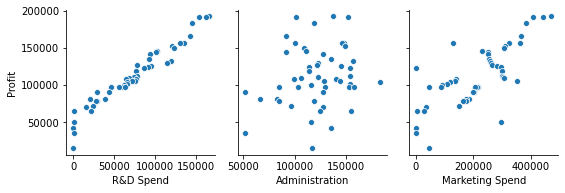

In [8]:
sns.pairplot(data=df, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars=["Profit"])

##### As the R&D Spend and profit are dependent on each other by 97.2%, also we can see a straight line which can fit are model for predicting profits in the graph, it is the best choice to take R&D Spend as X and Profit as Y for our Linear Regression model

#### Splitting our training and testing data

In [9]:
X = df['R&D Spend']
y = df['Profit']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=56)

In [12]:
m = len(X_train)

#### Normalizing

In [13]:
X_mean = X_train.mean()
X_std = X_train.std()
X_train = (X_train - X_mean) / X_std

y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std

In [14]:
X_train = X_train[:,np.newaxis]
y_train = y_train[:,np.newaxis]
ones = np.ones((m,1))
X_train = np.hstack((ones, X_train))

#### Creating our Linear Regression Model

In [15]:
iterations = 100
alpha = 1
theta = np.array([-1, 4])[:, np.newaxis]
theta

array([[-1],
       [ 4]])

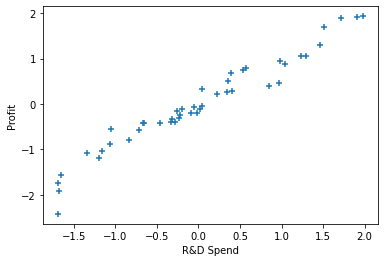

In [16]:
plt.scatter(X_train[:, 1], y_train, marker = '+')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [17]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeCost(X_train, y_train, theta)
print(J)

4.998784864197167


In [18]:
costHist = np.zeros([iterations+1, 1])
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        costHist[i] = computeCost(X, y, theta)
        temp = np.dot(X, theta) - y                      # np.dot - dot product
        temp = np.dot(X.T, temp)                         # T - transpose
        theta = theta - (alpha/m) * temp
    return theta

theta = gradientDescent(X_train, y_train, theta, alpha, iterations)
print(theta)

[[-7.87949952e-16]
 [ 9.74742506e-01]]


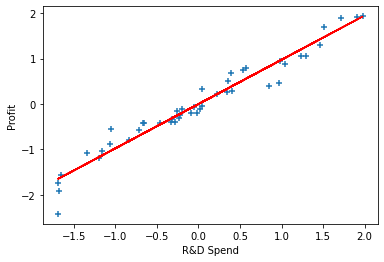

In [19]:
plt.scatter(X_train[:,1], y_train, marker = '+' )
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(X_train[:,1], np.dot(X_train, theta), 'r')
plt.show()

#### Making Predictions

In [20]:
def h_predict(x_sqft, theta):
    h_predict = y_std * (theta[0] + theta[1] * (x_sqft - X_mean)/X_std) + y_mean
    return h_predict

h_predict(X_test, theta)

45     47081.198013
40     71545.530154
38     64031.250434
7     161053.071383
20    113414.813555
Name: R&D Spend, dtype: float64

In [21]:
y_test

45     64926.08
40     78239.91
38     81229.06
7     155752.60
20    118474.03
Name: Profit, dtype: float64

##### By comparing the X_test and y_test values we can see the model is able to predict the correct profits in a certain range.